#Classification using Support Vector Machine
Please do not import any other python library except numpy and matplotlib 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Generating Random linearly separable data


In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)

#Visualizing the above data

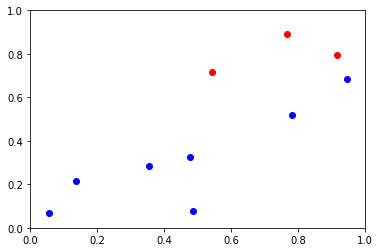

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.

In [0]:
def svm_function(x, y, epoch, l_rate):
    ####################################
    ### Write your code here ###########
    ####################################

    # Appending a fixed bias of +1 to all the datapoints
    list_X = x.tolist()
    for i in range(len(x)):
      list_X[i].append(1)
    x = np.asarray(list_X)
    
    # Initializing the weight vector with zeros 
    w = np.zeros(len(x[0]))

    # Updating the weight vector 
    for val in range(1,epoch):
        for i, point in enumerate(x):
            if (y[i]*np.dot(x[i], w)) < 1:
                w = w + l_rate * ((x[i]*y[i]) + (-2*(1/epoch)* w))
            else:
                w = w + l_rate * (-2*(1/epoch)* w)
    return w

#Run SVM Classifier

In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

#Visualize the classifier
Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

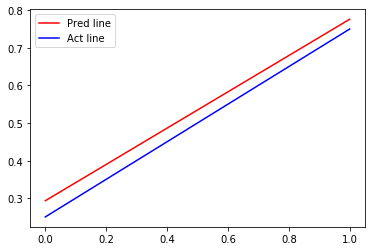

In [0]:
####################################
### Write your code here ###########
#################################### 

# Defining the points on X-axis 
x_points = np.linspace(0,1,1000)

# Defining and plotting the predicted line 
y_pred = (-w[0]*x_points - w[2])/w[1]
plt.plot(x_points, y_pred,'-r', label = 'Pred line')

# Defining and plotting the actual line 
y_act = (0.5*x_points + 0.25)
plt.plot(x_points, y_act, '-b', label = 'Act line')
plt.legend()

Increase the number of data-points and observe number of epochs to converge. Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

In [0]:
####################################
### Write your code here ###########
#################################### 

# Creating a dataset with 100 datapoints
large_data = [[np.random.rand(), np.random.rand()] for i in range(100)]
for i, point in enumerate(large_data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    large_data[i].append(-1)
  else:
    large_data[i].append(1)

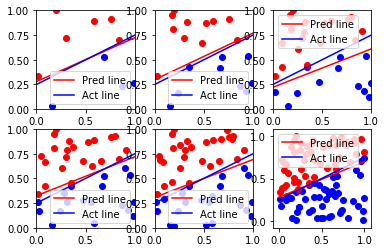

In [0]:
# Defining the number of datapoints 
data_points = [10, 20, 30, 40, 50, 100]
epochs = 10000
l_rate = 1

# Classifying the datapoints
for i,point in enumerate(data_points):
  my_data = large_data[:point]
  my_data = np.asarray(my_data)
  X = my_data[:,:2]
  Y = my_data[:,2]
  w= svm_function(X, Y, epochs, l_rate)
  x_points = np.linspace(0,1)
  plt.xlim(0,1)
  plt.ylim(0,1)

  # Plotting the subplots for different number of datapoints 
  plt.subplot(2, 3, (i+1))
  plt.plot(x_points, (-w[0]*x_points - w[2])/w[1],'-r', label = 'Pred line')
  plt.plot(x_points, (0.5*x_points + 0.25), '-b', label = 'Act line')
  for x, y, l in my_data:
    if l == 1: 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.legend()

#Perturbing the previously created  data
Add noise to the data and visualize the resulting classifier.




In [0]:
for i in range(len(data)):
  data[i][0] += (np.random.rand() - 0.5) / 2.
  data[i][1] += (np.random.rand() - 0.5) / 2.

#Visualizing the perturbed Data

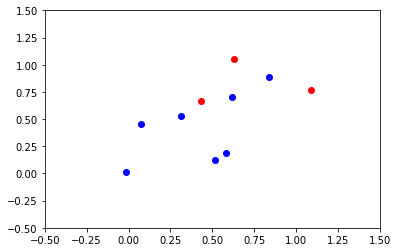

In [0]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(-0.5,1.5)
  plt.ylim(-0.5,1.5)

#Visualize the classifier trained on noisy data
Plot actual seperating line and seperating line you got from svm_classifier. Do this for 10, 20, 30, 40, 50 and 100 data points. You can vary the scale of noise as well. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

In [0]:
####################################
### Write your code here ###########
####################################

# Creating a dataset with 100 datapoints
large_noisy_data = [[np.random.rand(), np.random.rand()] for i in range(100)]

# Adding noise to the above data 
for i in range(len(large_data)):
  large_noisy_data[i][0] += (np.random.rand() - 0.5) / 2.
  large_noisy_data[i][1] += (np.random.rand() - 0.5) / 2.

for i, point in enumerate(large_noisy_data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    large_noisy_data[i].append(-1)
  else:
    large_noisy_data[i].append(1)

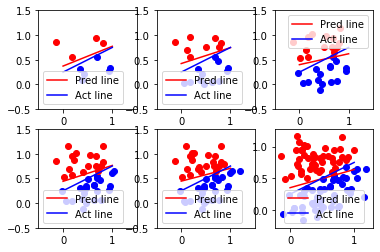

In [0]:
# Defining the number of datapoints 
data_points = [10, 20, 30, 40, 50, 100]
epochs = 10000
l_rate = 1

# Classifying the datapoints
for i,point in enumerate(data_points):
  my_noisy_data = large_noisy_data[:point]
  my_noisy_data = np.asarray(my_noisy_data)
  X = my_noisy_data[:,:2]
  Y = my_noisy_data[:,2]
  w = svm_function(X, Y, epochs, l_rate)
  x_points = np.linspace(0,1)
  plt.xlim(-0.5,1.5)
  plt.ylim(-0.5,1.5)

  # Plotting the subplots for different number of datapoints 
  plt.subplot(2, 3, (i+1))
  plt.plot(x_points, (-w[0]*x_points - w[2])/w[1],'-r', label = 'Pred line')
  plt.plot(x_points, (0.5*x_points + 0.25), '-b', label = 'Act line')
  for x, y, l in my_noisy_data:
    if l == 1: 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.legend()

#Read the Random Non-linear data stored in CSV1 and visualize it

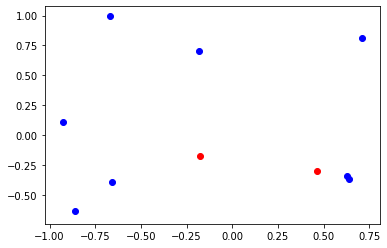

In [0]:
################################################
### Write your code here (read data) ###########
################################################
import csv
with open('csv1.csv', 'r') as f:
  values_csv1 = list(csv.reader(f, delimiter=','))

################################################
### Write your code here (visualization) #######
################################################
for x, y, l in values_csv1:
    if (int(l) == 1): 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(float(x), float(y), c=clr)

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). 
Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 


In [0]:
################################################
### Write your code here for features ##########
################################################
X = []
Y = []

for row in values_csv1:
  X.append(row[:-1])
  Y.append(row[-1])

X = np.array(X).astype('float64')
Y = np.array(Y).astype('float64')

X1 = X[:,0]
X2 = X[:,1]

def mapping(X1, X2):    
  x = np.c_[(X1, X2)]
  x_1 = x[:,0]**2        
  x_2 = np.sqrt(2)*x[:,0]*x[:,1]        
  x_3 = x[:,1]**2
  features_x = np.array([X1, X2, x_1, x_2, x_3])			
  return features_x

features_x = mapping(X1, X2)

################################################
### Write your code here for classification ####
################################################

# Calling the previously defined SVM function 
w =  svm_function(features_x.T, Y, 10000, 1) 
print(w)

[  1.78868205  -2.04984838 -12.9151083    3.64387534  -5.06811289
   3.77475978]


#Visualize decision boundary
Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1. Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.

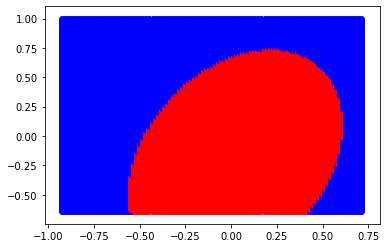

In [0]:
###################################
### Write your code here ##########
###################################

# Defining a function for visualizing the decision boundary 
def vis_dec_bnd():
  # Defining the two features for testing 
  X1space = np.linspace(np.min(X1), np.max(X1), 100)
  X2space = np.linspace(np.min(X2), np.max(X2), 100)

  # Creating the array of testing points 
  Xtest = []
  for i in range(100):
    for j in range(100):        
      Xtest.append([X1space[i],X2space[j]])
  Xtest = np.asarray(Xtest)

  # Extracting the features of testing points 
  features_x = mapping(Xtest[:,0], Xtest[:,1]).T

  # Adding a column of all ones to match with the dimension of weight vector  
  features_x = np.c_[features_x,np.ones(len(features_x))]

  # Classifying the points with trained SVM function 
  for i in range(len(features_x)):
    if np.dot(features_x[i], w) > 0:
      plt.scatter(Xtest[i,0], Xtest[i,1], c = "r")
    else:
      plt.scatter(Xtest[i,0], Xtest[i,1], c = "b")
  return None

# Calling the function to visualize decision boundary
vis_dec_bnd()

#Read the Random Non-linear data stored in CSV2

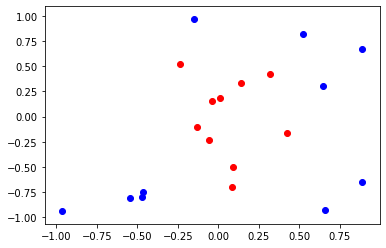

In [0]:
################################################
### Write your code here #######################
################################################
import csv
with open('csv2.csv', 'r') as f:
  values_csv2 = list(csv.reader(f, delimiter=','))

################################################
### Write your code here (visualization)########
################################################
for x, y, l in values_csv2:
    if (int(l) == 1): 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(float(x), float(y), c=clr)

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

[ 0.06968568 -0.16437523  0.06968568 -5.55632219 -0.16437523  4.69529641]


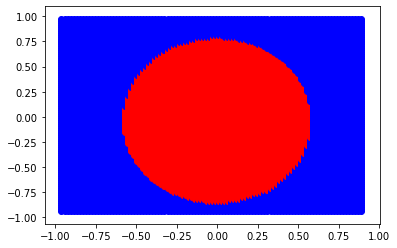

In [0]:
################################################
### Write your code here for features ##########
################################################
X = []
Y = []

for row in values_csv2:
  X.append(row[:-1])
  Y.append(row[-1])

X = np.array(X).astype('float64')
Y = np.array(Y).astype('float64')

X1 = X[:,0]
X2 = X[:,1]

def mapping(X1, X2):    
  x = np.c_[(X1, X2)]
  x_1 = x[:,0]        
  x_2 = pow(x[:,0], 2)/0.4 + pow(x[:,1], 2)/0.8        
  x_3 = x[:,1]
  features_x = np.array([X1, X2, x_1, x_2, x_3])			
  return features_x

features_x = mapping(X1, X2)

#####################################################
### Write your code here for classification #########
#####################################################

# Calling the previously defined SVM function 
w = svm_function(features_x.T, Y, 10000, 1) 
print(w)

######################################################
### Write your code here for visualization ###########
######################################################

# Calling the function to visualize decision boundary
vis_dec_bnd()

#Read the Random Non-linear data stored in CSV3

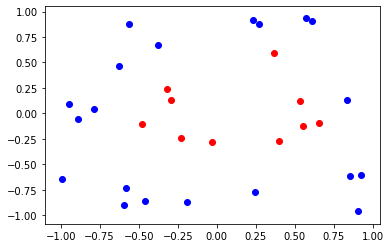

In [0]:
################################################
### Write your code here ####################### 
################################################ 
import csv
with open('csv3.csv', 'r') as f:
  values_csv3 = list(csv.reader(f, delimiter=','))

################################################
### Write your code here (visualization) #######
################################################
for x, y, l in values_csv3:
    if (int(l) == 1): 
      clr = 'red'
    else: 
      clr = 'blue'
    plt.scatter(float(x), float(y), c=clr)

#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

[ 1.56681073  0.66566168 -3.47320174 -5.63906076  0.0748044   5.85516623]


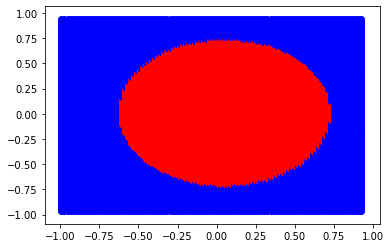

In [0]:
################################################
### Write your code here for features ##########
################################################
X = []
Y = []

for row in values_csv3:
  X.append(row[:-1])
  Y.append(row[-1])

X = np.array(X).astype('float64')
Y = np.array(Y).astype('float64')

X1 = X[:,0]
X2 = X[:,1]

def mapping(X1, X2):    
  x = np.c_[(X1, X2)]
  x_1 = pow(x[:,0], 2)        
  x_2 = pow(x[:,0], 2)/0.6 + pow(x[:,1], 2)/0.5        
  x_3 = pow(x[:,1], 2)
  features_x = np.array([X1, X2, x_1, x_2, x_3])			
  return features_x

features_x = mapping(X1, X2)

#####################################################
### Write your code here for classification #########
#####################################################

# Calling the previously defined SVM function 
w = svm_function(features_x.T, Y, 10000, 1) 
print(w)

######################################################
### Write your code here for visualization ###########
######################################################

# Calling the function to visualize decision boundary
vis_dec_bnd()